## Airbnb BI final project by Javier Rodriguez
### Chosing Airbnb price, clustering and predicting with random forest

In [1]:
#loading useful libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [62]:
#importing the data and getting a first view of it
raw_df = pd.read_csv(r'C:\Users\jrodr\OneDrive\Documentos\BI Dalarna University\Business Intelligence\Project\Airbnb Cleaned Europe Dataset.csv')
raw_df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


### Cleaning and Pre-processing 

In [63]:
#looking for NA values and data types
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [64]:
raw_df.describe().T
#variables Attraction Index and Restaurant Index already have their scaled version from 0 to 100 in the 
#columns named Normalised Attraction Index and Normalised Restaurant Index 

,count,mean,std,min,25%,50%,75%,max
Price,41714.0,260.094423,279.408493,34.779339,144.016085,203.819274,297.373358,18545.450285
Person Capacity,41714.0,3.237235,1.299459,2.000000,2.000000,3.000000,4.000000,6.000000
Multiple Rooms,41714.0,0.295273,0.456171,0.000000,0.000000,0.000000,1.000000,1.000000
Business,41714.0,0.341180,0.474112,0.000000,0.000000,0.000000,1.000000,1.000000
Cleanliness Rating,41714.0,9.442274,0.889173,2.000000,9.000000,10.000000,10.000000,10.000000
Guest Satisfaction,41714.0,93.103179,8.141745,20.000000,90.000000,95.000000,98.000000,100.000000
Bedrooms,41714.0,1.165939,0.638157,0.000000,1.000000,1.000000,1.000000,10.000000
City Center (km),41714.0,2.679792,1.996684,0.015045,1.275913,2.253237,3.584489,25.284557
Metro Distance (km),41714.0,0.603921,0.706206,0.002301,0.236693,0.391220,0.678702,14.273577
Attraction Index,41714.0,293.905990,235.750055,15.152201,124.371614,228.920599,394.000201,4513.563486


In [65]:
#printing all unique values for the categorical variables so I get a better idea of the data and 
#of the dimensions after One-hot encoding
raw_df["Day"].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [66]:
raw_df['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [67]:
raw_df['City'].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
       'Paris', 'Rome', 'Vienna'], dtype=object)

In [68]:
#I like to mantain the original dataframe and transform it in a new one
df = raw_df.copy()

In [69]:
#having the normalized variables conserving these two would led to overfitting
#also removing Shared Room and Private Room because the content is the same as in Room Type
df = df.drop(["Normalised Restraunt Index","Normalised Attraction Index", "Shared Room", "Private Room"], axis=1)

In [70]:
#changing the boolean variable left to integer. 1 if True and 0 if False
df['Superhost'] = df['Superhost'].astype(int)

<Axes: >

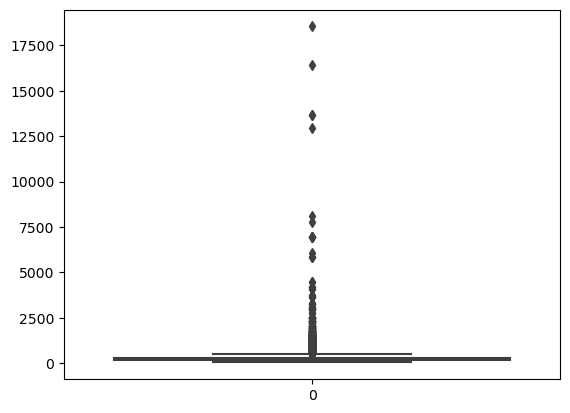

In [71]:
sns.boxplot(df['Price'])
#there are outliers in the price variable

<Axes: xlabel='Price', ylabel='Count'>

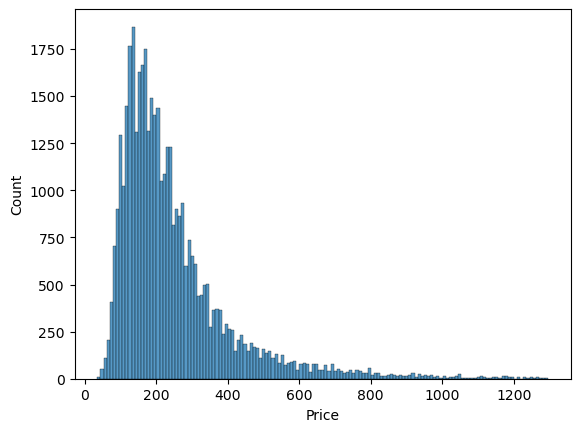

In [72]:
#we can see the price variable has a skewed distribution 
sns.histplot(df[df['Price'] < 1300]['Price'])

In [73]:
#IQR technique for detecting outliers since it is a better option for non-normal distribution
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1

low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr
print('Lower limit is:', round(low_limit,2))
print('Upper limit is:', round(up_limit,2))

outliers = sum(df.Price>up_limit)
print('Number of outliers:', outliers)

Lower limit is: -86.02
Upper limit is: 527.41
Number of outliers: 2891


In [74]:
df.shape

(41714, 15)

In [75]:
df = df[df.Price<up_limit]
df.shape

(38823, 15)

### Descriptive visuals

Text(0.5, 1.0, 'City Count in %')

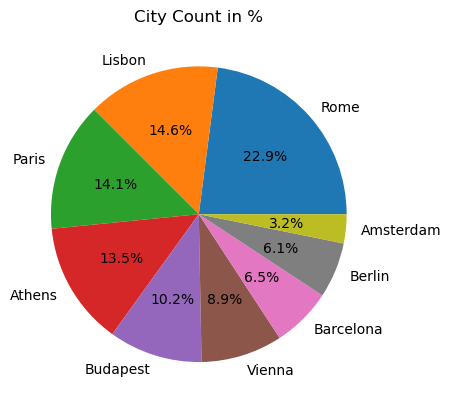

In [16]:
city_count = df['City'].value_counts()
plt.pie(city_count, labels = city_count.index, autopct='%1.1f%%')
plt.title('City Count in %')

Text(0, 0.5, 'Number os Airbnbs')

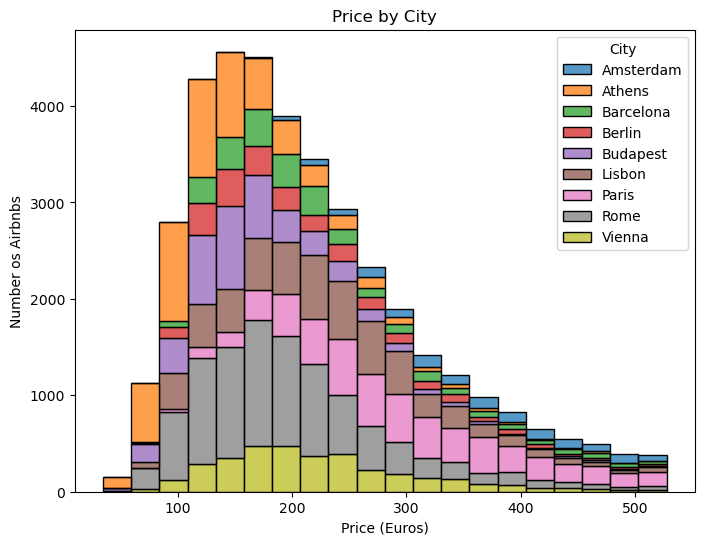

In [39]:
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = 'Price', hue = 'City', bins = 20, multiple = 'stack')

plt.title('Price by City')
plt.xlabel('Price (Euros)')
plt.ylabel('Number os Airbnbs')

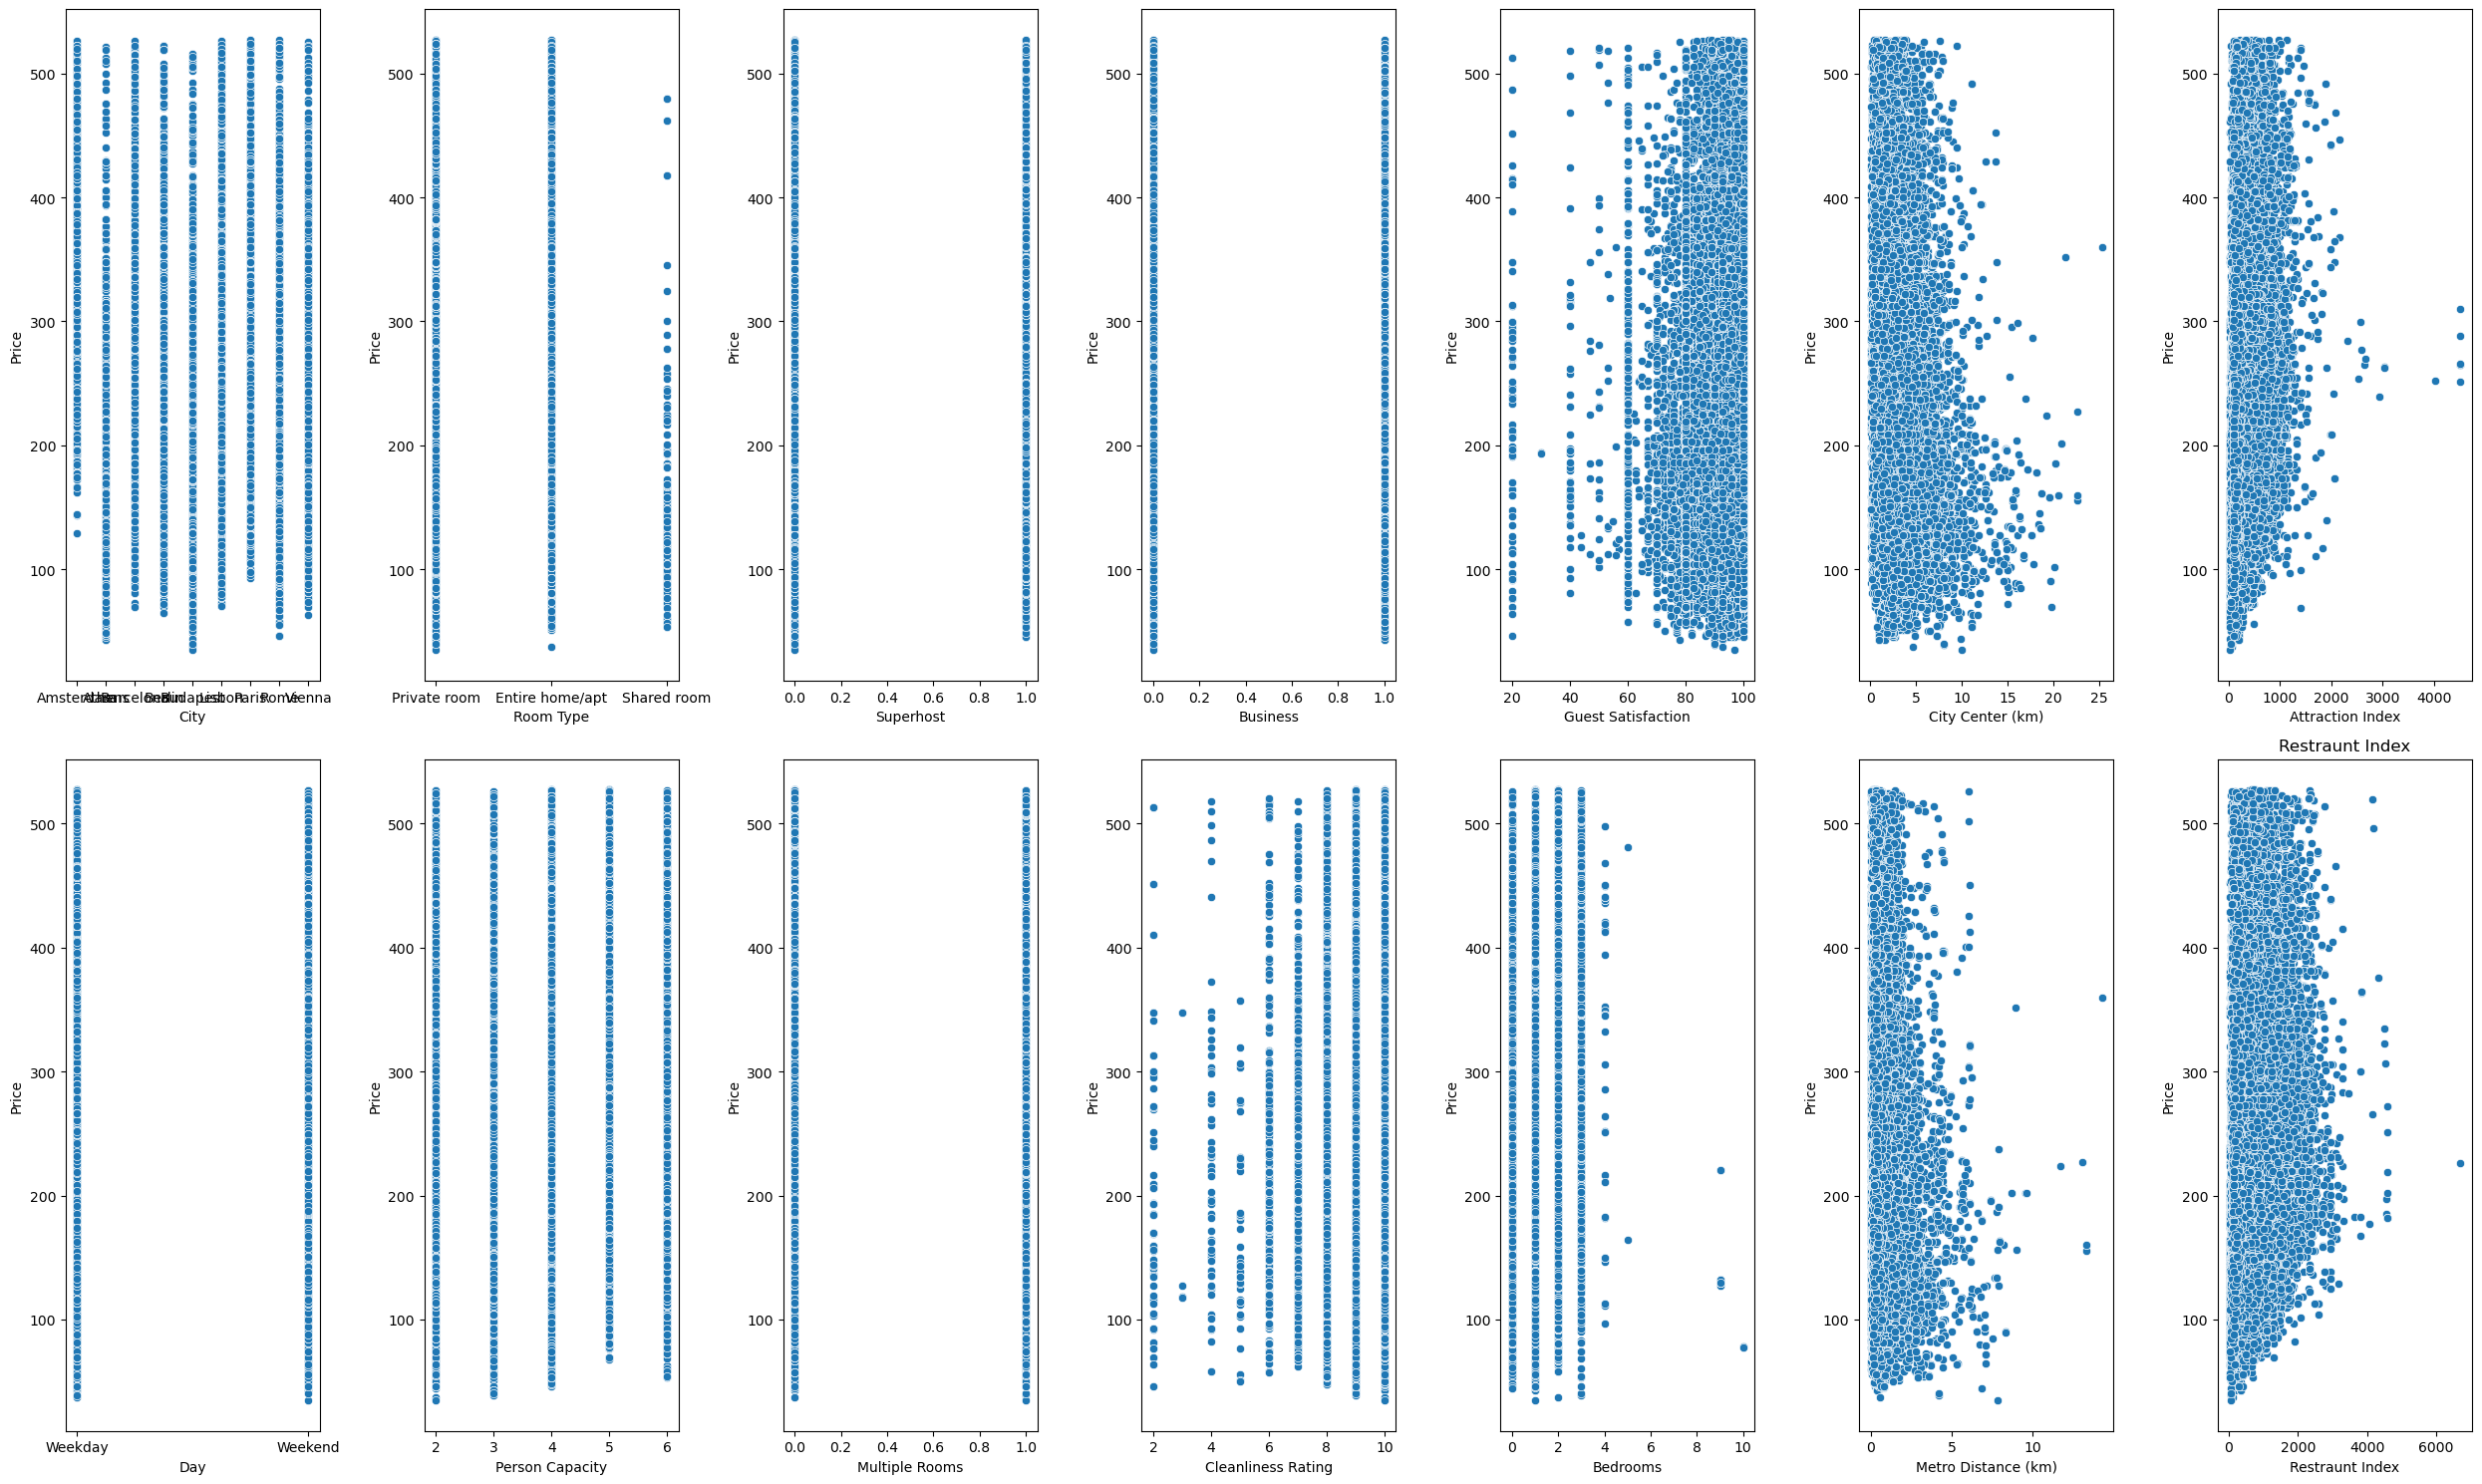

In [114]:
#plotting all variable along with price
x_columns = df.columns[df.columns != 'Price']
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(25, 15))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(x_columns):
    sns.scatterplot(data=df, x=column, y='Price', ax=axes[i%2, i//2])
    plt.title(x_columns[i])

plt.tight_layout()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15488\2204988660.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="coolwarm",annot=True)


<Axes: >

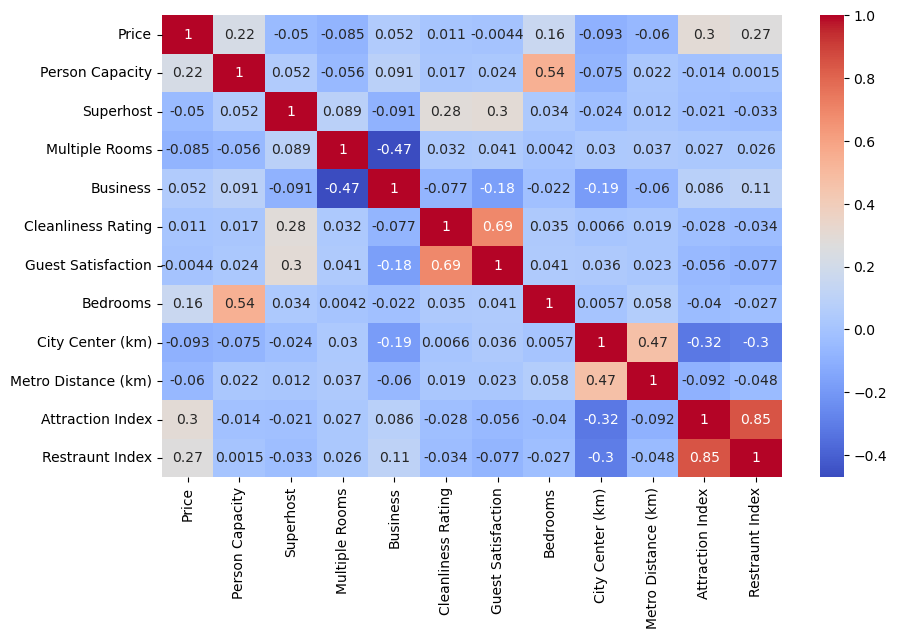

In [116]:
#correlation heatmap plot to see which variables may be relvant for the analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

### Clustering

In [78]:
num_df = df[["Price","Person Capacity", "Multiple Rooms", "Business", "Cleanliness Rating", "Guest Satisfaction", "Bedrooms", "City Center (km)", "Metro Distance (km)", "Attraction Index", "Restraunt Index"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)
scaled_data = pd.DataFrame(scaled_data)

In [79]:
#looping many number of clusters to later visualize the elbow plot
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=23)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

C:\Users\jrodr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jrodr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jrodr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jrodr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jrodr\anaconda3\lib\site-packages\sklearn\clust

Text(0, 0.5, 'WCSS')

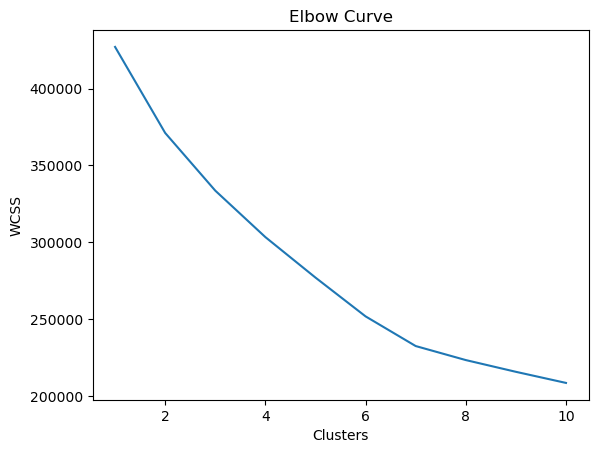

In [80]:
#elbow curve to see how many clusters is the best option
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [81]:
#running the algorithm with 3 clusters
kmeans = KMeans(n_clusters=7)
k_pred = kmeans.fit_predict(scaled_data)
df['cluster'] = k_pred #adding the variable cluster

C:\Users\jrodr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Attraction Index', ylabel='Price'>

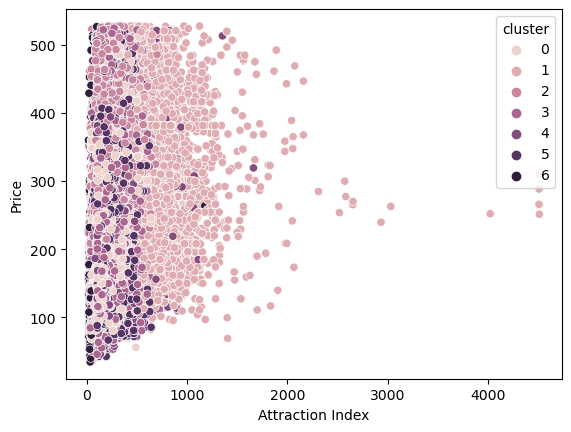

In [24]:
#visualize the outcome of the clustering plus the centroids
#I choose the variable Normalised Attraction Index because it is the one with the highest correlation with Price
sns.scatterplot(data=df, x='Attraction Index', y='Price', hue='cluster')

In [30]:
mean_values = df.groupby('cluster').mean()
mean_values.T

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11892\1277311730.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = df.groupby('cluster').mean()


cluster,0,1,2,3,4,5,6
Price,204.458383,287.227667,263.764419,185.034116,214.444258,195.451929,185.993742
Person Capacity,2.671018,3.260910,5.002280,2.720383,2.995635,2.915642,3.065018
Superhost,0.297235,0.272748,0.326552,0.355887,0.018429,0.241645,0.281979
Multiple Rooms,0.000000,0.290854,0.226412,1.000000,0.179437,0.000000,0.350530
Business,0.000000,0.429201,0.338127,0.000000,0.539767,1.000000,0.191519
Cleanliness Rating,9.617699,9.472377,9.617853,9.585061,7.105723,9.540191,9.556184
Guest Satisfaction,95.586615,93.027391,94.775693,94.427186,71.252182,93.019381,94.247350
Bedrooms,0.897788,1.098886,2.127499,0.969322,1.008244,0.877252,1.194346
City Center (km),3.057309,1.763790,2.414644,2.715511,2.618299,2.122870,7.791286
Metro Distance (km),0.498322,0.665981,0.515307,0.516658,0.481770,0.439824,3.245335


In [33]:
mean_values.T.to_excel('mean_values_clustering.xlsx', index=False)

### Random Forest

In [82]:
#turning categorical variables into numerical by creating dummy variables (One-hot encoding) for rnadom forest
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df.head()

,Price,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,cluster
0,194.033698,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,344.245776,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2
2,264.101422,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,433.529398,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,1,0,0,0,0,0,0,0,0,1,0,0,1,0,6
4,485.552926,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2


In [91]:
#creating dependent and independent division
y = df["Price"]
X = df.drop(["Price", "cluster"], axis=1)

In [92]:
#spliting the data into training set and test set. 30% for testing
from sklearn.model_selection import train_test_split 
ytrain, ytest, Xtrain, Xtest = train_test_split(y, X, test_size = 0.3, random_state = 23)

In [93]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=100, random_state = 23)
rforest.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=23)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
ypred = rforest.predict(Xtest)

mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2388.880411127166
R-squared: 0.7665828900168803


In [95]:
X.describe() 

,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
count,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000,38823.000000
mean,3.171677,0.284393,0.300260,0.340262,9.442933,93.063699,1.128326,2.702269,0.610430,285.261013,617.578365,0.031734,0.134894,0.065348,0.060789,0.102362,0.145635,0.140613,0.229477,0.089148,0.502408,0.497592,0.662700,0.329212,0.008088
std,1.271467,0.451131,0.458377,0.473803,0.888674,8.124837,0.604592,2.012877,0.716008,233.236604,523.676259,0.175293,0.341615,0.247142,0.238945,0.303128,0.352745,0.347626,0.420502,0.284961,0.500001,0.500001,0.472794,0.469933,0.089570
min,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.034661,0.002301,15.152201,19.576924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.288647,0.241215,120.989435,203.033114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.276415,0.396646,220.490624,503.195580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,1.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.611201,0.683034,377.343377,840.517691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,6696.156772,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
### lets predict the price for all the averages of the numeric independent variables for an Entire Apartment in Barcelona
#for a 2 people capacity and 1 beedroom to later compare with renting prices for houses/flats with the same especifications
data_to_predict = np.array([[2, np.mean(X["Superhost"]), np.mean(X["Multiple Rooms"]), np.mean(X["Business"]),
     np.mean(X["Cleanliness Rating"]), np.mean(X["Guest Satisfaction"]), 1, np.mean(X["City Center (km)"]),
     np.mean(X["Metro Distance (km)"]), np.mean(X["Attraction Index"]),
     np.mean(X["Restraunt Index"]), 0, 0, 1, 0, 0, 0, 0, 0, 0, np.mean(X["Day_Weekday"]),
     np.mean(X["Day_Weekend"]), 1, 0, 0]])

rforest.predict(data_to_predict)

C:\Users\jrodr\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([327.60532654])

Text(0.5, 1.0, 'Variable Importances')

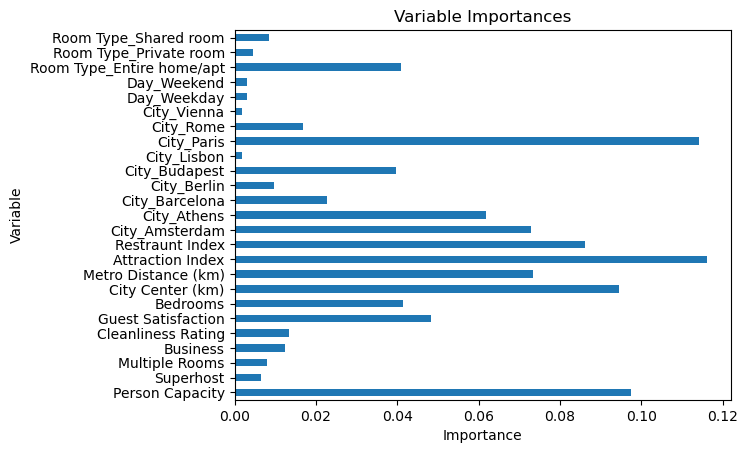

In [97]:
#doing feature selection now using random forest
imp_features = pd.DataFrame(rforest.feature_importances_)
imp_features.index=X.columns
imp_features.plot.barh(legend=(), )
plt.ylabel('Variable'); plt.xlabel('Importance'); plt.title('Variable Importances')

In [98]:
imp_features = imp_features.sort_values(0, ascending=False)
imp_features = imp_features.head(4)
imp_features#top 4 most important features according to the random forest model

,0
Attraction Index,0.116160
City_Paris,0.114321
Person Capacity,0.097579
City Center (km),0.094534


In [99]:
#creating a new model with only the relevant features as predictors
y = df["Price"]
X = df[["Attraction Index", "City Center (km)", "Person Capacity"]]

In [100]:
ytrain, ytest, Xtrain, Xtest = train_test_split(y, X, test_size = 0.3, random_state = 23)
r_forest = RandomForestRegressor(n_estimators=100, random_state = 23)
r_forest.fit(Xtrain, ytrain)
ypred = r_forest.predict(Xtest)
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)
r2 = r2_score(ytest, ypred)
print("R-squared:", r2)
#the decrease in performance is really high, but for a different non-emsembled method this information might be useful

Mean Squared Error: 4876.512259256985
R-squared: 0.5235167934522333
